Jupyter Notebook for final project on cell nuclei classification in histopathology images.

Bounding Box

In [1]:
#Define directory
directory = r'C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Classification'

(500, 500, 3)


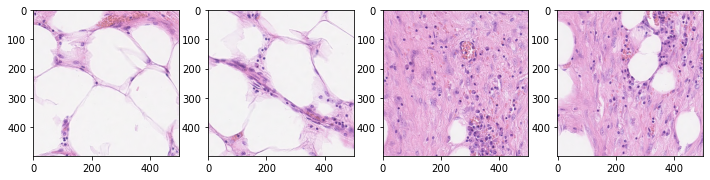

In [2]:
# Display example images and shape from dataset
from matplotlib import image
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12, 5))
for i in range(4):
    i = i + 1
    fig.add_subplot(1, 4, i)
    example_image = r'C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Classification/img{}/img{}.bmp'.format(i,i)
    data = image.imread(example_image)
    plt.imshow(data)
print(data.shape)
plt.show()

In [3]:
#Extract matlab coordinates for different cell nuclei
from os.path import dirname, join as pjoin
import scipy.io as sio
data_dir = pjoin(dirname(sio.__file__), 'matlab', 'tests', 'data')
mat_fname = pjoin(data_dir, 'testdouble_7.4_GLNX86.mat')

In [4]:
#Make DataFrame of image pixel values
import glob
import pandas as pd
image_data = pd.DataFrame()
image_files = glob.glob('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Classification/**/*.bmp',  
                   recursive = True)
mat_files = glob.glob('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Classification/**/*.mat',  
                   recursive = True)
detection_list = []
detection_list_2 = []
count = 0
for image_file in image_files:
    data_img = image.imread(image_file)
    image_data = image_data.append({'X_values': data_img},ignore_index=True)

In [5]:
#Make DataFrame of matlab coordinate values
detection_data = pd.DataFrame()
mat_files = glob.glob('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Classification/**/*.mat',  
                   recursive = True)
detection_list = []
detection_list_2 = []
count = 0

for mat_file in mat_files:
    mat_contents = sio.loadmat(mat_file)
    detection = mat_contents['detection']
    detection_list.append(detection)
    if len(detection_list) == 4:
        detection_data = detection_data.append({'Detection': detection_list[0],'Detection_1': detection_list[1],'Detection_2': detection_list[2],'Detection_3': detection_list[3]},ignore_index=True)
        detection_list = []

In [6]:
#Concatenate image pixel values and cell nuclei coordinate Dataframes
result = pd.concat([image_data, detection_data], axis = 1)

In [7]:
#Print out concatenated Dataframe
result

,X_values,Detection,Detection_1,Detection_2,Detection_3
0,"[[[225, 197, 232], [215, 182, 225], [219, 179,...",[],"[[148.78269484808447, 181.47754293262892], [96...","[[8.524251069900174, 15.656918687589183], [38....","[[219.1261558784676, 251.3256274768827], [111...."
1,"[[[166, 115, 192], [179, 128, 204], [164, 114,...","[[7.76238937848143, 7.602391553009795], [159.0...","[[65.88969616908867, 5.618890356673148], [102....","[[84.71400264200804, 5.288639365920176], [98.5...","[[360.52139800285306, 270.4714693295291]]"
2,"[[[243, 241, 244], [243, 241, 244], [244, 241,...",[],"[[26, 305], [31, 290], [47, 308], [48, 330], [...","[[104.0, 425.0], [311.619205254858, 496.238410...","[[19, 270], [53, 120], [69, 213], [100, 143], ..."
3,"[[[229, 201, 213], [214, 186, 193], [220, 187,...",[],"[[75.6353790613718, 51.267148014440465], [203....","[[51.71841155234654, 19.22743682310471], [30.9...","[[487.1877256317687, 38.63176895306856], [488...."
4,"[[[91, 65, 63], [68, 40, 35], [76, 47, 45], [8...",[],"[[7.04332129963899, 155.37509000101954], [72.0...","[[18.324909747292452, 74.14765317791489], [10....","[[90.07581227436822, 157.18014415264406], [28...."
...,...,...,...,...,...
95,"[[[215, 188, 215], [231, 206, 232], [234, 210,...",[],"[[2, 221], [17, 153], [19, 19], [26, 211], [36...","[[2.0, 103.0], [13.49773869346734, 177.7443467...","[[110, 228], [222, 80]]"
96,"[[[243, 243, 244], [243, 243, 244], [243, 243,...",[],"[[29, 414]]","[[56, 406], [410, 217]]","[[184, 337], [192, 328], [243, 308]]"
97,"[[[236, 204, 237], [255, 221, 255], [243, 206,...",[],"[[6.961416967509024, 13.64688628158845], [2.0,...","[[41.0, 103.0], [49.0, 89.0], [74.0, 101.0], [...","[[8.0, 275.0], [9.0, 494.0], [11.0, 350.0], [3..."
98,"[[[102, 70, 163], [176, 136, 208], [218, 170, ...",[],"[[19.0, 39.0], [25.0, 310.0], [41.0, 24.990954...","[[1.0, 70.0], [5.451037906137174, 52.293772563...","[[66.0, 146.0], [226.0, 25.0], [244.0, 474.0],..."


In [8]:
#Take values for each column of concatenated Dataframe
result_values = result.values
X = result_values[0:100, 0]
Y_1 = result_values[0:100,1]
Y_2 = result_values[0:100,2]
Y_3 = result_values[0:100,3]
Y_4 = result_values[0:100,4]

In [9]:
#Check bounding box algorithm
import numpy as np
pixel_value_list = []
X[0].shape
new = X[0][132:164]
#newer = new[5][132:164]
for i in range(len(new)):
    pixel_values = new[i][165:197]
    pixel_value_list.append(pixel_values)
np.array(pixel_value_list).shape

(32, 32, 3)

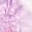

In [10]:
#Print out test image from bounding box
import PIL
img = PIL.Image.fromarray(np.array(pixel_value_list), "RGB")
img

In [11]:
#Extract values from Y column 1 values
list_values_1 = []
classifications_1 = []
list_index_1 = []
for i in range(len(Y_1)):
    for z in range(len(Y_1[i])):
        final_val = Y_1[i][z]
        list_values_1.append(final_val)
        list_index_1.append(i)
        classifications_1.append(0)

In [12]:
#Extract values from Y column 2 values
list_values_2 = []
classifications_2 = []
list_index_2 = []
for i in range(len(Y_2)):
    for z in range(len(Y_2[i])):
        final_val = Y_2[i][z]
        list_values_2.append(final_val)
        list_index_2.append(i)
        classifications_2.append(1)

In [13]:
#Extract values from Y column 3 values
list_values_3 = []
classifications_3 = []
list_index_3 = []
for i in range(len(Y_3)):
    for z in range(len(Y_3[i])):
        final_val = Y_3[i][z]
        list_values_3.append(final_val)
        list_index_3.append(i)
        classifications_3.append(2)

In [14]:
#Extract values from Y column 4 values
list_values_4 = []
classifications_4 = []
list_index_4 = []
for i in range(len(Y_4)):
    for z in range(len(Y_4[i])):
        final_val = Y_4[i][z]
        list_values_4.append(final_val)
        list_index_4.append(i)
        classifications_4.append(3)

In [15]:
#Check the coordinate values
list_values_1[151]

array([394.65455746, 487.95046235])

In [16]:
#Bounding boxes for all epithelial nuclei
first_all_DF = pd.DataFrame()
count = 0
pixel_value_list = []
for i in range(len(list_values_1)):
    if list_index_1[i] != count:
        count = count + 1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] == count:
        x_map = int(list_values_1[i][0])
        y_map = int(list_values_1[i][1])
        if y_map > 484:
            value = X[count][(y_map-(32-(500-y_map))):500]
        elif y_map < 16:
            value = X[count][0:((y_map+16)+(16-y_map))]
        else:
            value = X[count][(y_map-16):(y_map+16)]
        if x_map > 484:
            for i in range(len(value)):
                pixel_values = value[i][(x_map-(32-(500-x_map))):500]
                pixel_value_list.append(pixel_values)
        elif x_map < 16:
            for i in range(len(value)):
                pixel_values = value[i][0:((x_map+16)+(16-x_map))]
                pixel_value_list.append(pixel_values)
        else:
            for i in range(len(value)):
                pixel_values = value[i][(x_map-16):(x_map+16)]
                pixel_value_list.append(pixel_values)
        new_pixel_values = pixel_value_list
        first_all_DF = first_all_DF.append({'Pixel Values': new_pixel_values, 'Z_Label': classifications_1[i]},ignore_index=True)
        pixel_value_list = []
        new_pixel_values = 0

In [17]:
#Print out all epithelial nuclei dataframe
first_all_DF

,Pixel Values,Z_Label
0,"[[[166, 115, 192], [179, 128, 204], [164, 114,...",0.0
1,"[[[184, 138, 196], [175, 130, 192], [188, 143,...",0.0
2,"[[[190, 147, 213], [203, 161, 223], [195, 154,...",0.0
3,"[[[215, 173, 226], [189, 151, 206], [180, 144,...",0.0
4,"[[[200, 157, 217], [189, 147, 206], [168, 128,...",0.0
...,...,...
7717,"[[[213, 182, 224], [207, 173, 213], [226, 189,...",0.0
7718,"[[[196, 144, 210], [213, 161, 223], [211, 160,...",0.0
7719,"[[[167, 120, 184], [170, 126, 184], [184, 142,...",0.0
7720,"[[[203, 155, 210], [206, 159, 214], [226, 181,...",0.0


In [41]:
#Bounding boxes for centered epithelial nuclei
first_centered_DF = pd.DataFrame()
count = 0
pixel_value_list = []
for i in range(len(list_values_1)):
    if list_index_1[i] != count:
        count = count + 1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] != count:
        count = count+1
    if list_index_1[i] == count:
        x_map = int(list_values_1[i][0])
        y_map = int(list_values_1[i][1])
        if y_map > 484 or y_map < 16 or x_map > 484 or x_map < 16:
            count = count
        else:
            value = X[count][(y_map-16):(y_map+16)]
            for i in range(len(value)):
                pixel_values = value[i][(x_map-16):(x_map+16)]
                pixel_value_list.append(pixel_values)
            new_pixel_values = pixel_value_list
            first_centered_DF = first_centered_DF.append({'Pixel Values': new_pixel_values, 'Z_Label': classifications_1[i]},ignore_index=True)
        pixel_value_list = []
        new_pixel_values = 0

In [42]:
#Print out centered epithelial nuclei dataframe
first_centered_DF

,Pixel Values,Z_Label
0,"[[[190, 147, 213], [203, 161, 223], [195, 154,...",0.0
1,"[[[215, 173, 226], [189, 151, 206], [180, 144,...",0.0
2,"[[[200, 157, 217], [189, 147, 206], [168, 128,...",0.0
3,"[[[208, 158, 212], [203, 153, 209], [199, 148,...",0.0
4,"[[[206, 166, 219], [213, 175, 222], [223, 186,...",0.0
...,...,...
6933,"[[[255, 219, 255], [238, 186, 236], [192, 138,...",0.0
6934,"[[[233, 193, 239], [213, 173, 221], [192, 151,...",0.0
6935,"[[[148, 101, 178], [156, 107, 175], [204, 155,...",0.0
6936,"[[[196, 144, 210], [213, 161, 223], [211, 160,...",0.0


In [20]:
#Bounding boxes for all fibroblast nuclei
second_all_DF = pd.DataFrame()
count = 0
pixel_value_list = []
for i in range(len(list_values_2)):
    if list_index_2[i] != count:
        count = count+1
    if list_index_2[i] != count:
        count = count+1
    if list_index_2[i] != count:
        count = count+1
    if list_index_2[i] == count:
        x_map = int(list_values_2[i][0])
        y_map = int(list_values_2[i][1])
        if y_map > 484:
            value = X[count][(y_map-(32-(500-y_map))):500]
        elif y_map < 16:
            value = X[count][0:((y_map+16)+(16-y_map))]
        else:
            value = X[count][(y_map-16):(y_map+16)]
        if x_map > 484:
            for i in range(len(value)):
                pixel_values = value[i][(x_map-(32-(500-x_map))):500]
                pixel_value_list.append(pixel_values)
        elif x_map < 16:
            for i in range(len(value)):
                pixel_values = value[i][0:((x_map+16)+(16-x_map))]
                pixel_value_list.append(pixel_values)
        else:
            for i in range(len(value)):
                pixel_values = value[i][(x_map-16):(x_map+16)]
                pixel_value_list.append(pixel_values)
        new_pixel_values = pixel_value_list
        second_all_DF = second_all_DF.append({'Pixel Values': new_pixel_values, 'Z_Label': classifications_2[i]},ignore_index=True)
        pixel_value_list = []

In [21]:
#Print out all fibroblast nuclei dataframe
second_all_DF

,Pixel Values,Z_Label
0,"[[[221, 197, 220], [229, 204, 227], [229, 203,...",1.0
1,"[[[232, 198, 234], [241, 204, 241], [216, 175,...",1.0
2,"[[[243, 242, 242], [246, 244, 245], [245, 241,...",1.0
3,"[[[245, 243, 244], [245, 243, 245], [242, 239,...",1.0
4,"[[[195, 142, 198], [213, 154, 205], [200, 137,...",1.0
...,...,...
5707,"[[[211, 179, 214], [220, 186, 221], [239, 203,...",1.0
5708,"[[[218, 187, 217], [204, 170, 206], [211, 173,...",1.0
5709,"[[[242, 240, 241], [242, 241, 242], [243, 242,...",1.0
5710,"[[[243, 239, 242], [246, 241, 247], [248, 243,...",1.0


In [43]:
#Bounding boxes for centered fibroblast nuclei
second_centered_DF = pd.DataFrame()
count = 0
pixel_value_list = []
for i in range(len(list_values_2)):
    if list_index_2[i] != count:
        count = count+1
    if list_index_2[i] != count:
        count = count+1
    if list_index_2[i] != count:
        count = count+1
    if list_index_2[i] == count:
        x_map = int(list_values_2[i][0])
        y_map = int(list_values_2[i][1])
        if y_map > 484 or y_map < 16 or x_map > 484 or x_map < 16:
            count = count
        else:
            value = X[count][(y_map-16):(y_map+16)]
            for i in range(len(value)):
                pixel_values = value[i][(x_map-16):(x_map+16)]
                pixel_value_list.append(pixel_values)
            new_pixel_values = pixel_value_list
            second_centered_DF = second_centered_DF.append({'Pixel Values': new_pixel_values, 'Z_Label': classifications_2[i]},ignore_index=True)
        pixel_value_list = []

In [44]:
#Print out centered fibroblast nuclei dataframe
second_centered_DF

,Pixel Values,Z_Label
0,"[[[221, 197, 220], [229, 204, 227], [229, 203,...",1.0
1,"[[[232, 198, 234], [241, 204, 241], [216, 175,...",1.0
2,"[[[243, 242, 242], [246, 244, 245], [245, 241,...",1.0
3,"[[[245, 243, 244], [245, 243, 245], [242, 239,...",1.0
4,"[[[195, 142, 198], [213, 154, 205], [200, 137,...",1.0
...,...,...
5047,"[[[249, 195, 244], [226, 173, 221], [212, 161,...",1.0
5048,"[[[211, 179, 214], [220, 186, 221], [239, 203,...",1.0
5049,"[[[218, 187, 217], [204, 170, 206], [211, 173,...",1.0
5050,"[[[242, 240, 241], [242, 241, 242], [243, 242,...",1.0


In [24]:
#Bounding boxes for all inflammatory nuclei
third_all_DF = pd.DataFrame()
count = 0
pixel_value_list = []
for i in range(len(list_values_3)):
    if list_index_3[i] != count:
        count = count+1
    if list_index_3[i] != count:
        count = count+1
    if list_index_3[i] == count:
        x_map = int(list_values_3[i][0])
        y_map = int(list_values_3[i][1])
        if y_map > 484:
            value = X[count][(y_map-(32-(500-y_map))):500]
        elif y_map < 16:
            value = X[count][0:((y_map+16)+(16-y_map))]
        else:
            value = X[count][(y_map-16):(y_map+16)]
        if x_map > 484:
            for i in range(len(value)):
                pixel_values = value[i][(x_map-(32-(500-x_map))):500]
                pixel_value_list.append(pixel_values)
        elif x_map < 16:
            for i in range(len(value)):
                pixel_values = value[i][0:((x_map+16)+(16-x_map))]
                pixel_value_list.append(pixel_values)
        else:
            for i in range(len(value)):
                pixel_values = value[i][(x_map-16):(x_map+16)]
                pixel_value_list.append(pixel_values)
        new_pixel_values = pixel_value_list
        third_all_DF = third_all_DF.append({'Pixel Values': new_pixel_values, 'Z_Label': classifications_3[i]},ignore_index=True)
        pixel_value_list = []

In [25]:
#Print out all inflammatory nuclei dataframe
third_all_DF

,Pixel Values,Z_Label
0,"[[[225, 197, 232], [215, 182, 225], [219, 179,...",2.0
1,"[[[213, 154, 198], [214, 153, 196], [234, 172,...",2.0
2,"[[[229, 188, 236], [225, 175, 228], [216, 157,...",2.0
3,"[[[194, 135, 185], [212, 152, 191], [200, 138,...",2.0
4,"[[[205, 137, 189], [201, 131, 183], [200, 127,...",2.0
...,...,...
6966,"[[[239, 220, 245], [239, 219, 245], [241, 222,...",2.0
6967,"[[[222, 196, 225], [236, 215, 238], [242, 226,...",2.0
6968,"[[[245, 230, 244], [255, 247, 255], [241, 232,...",2.0
6969,"[[[251, 215, 252], [254, 216, 255], [237, 198,...",2.0


In [45]:
#Bounding boxes for centered inflammatory nuclei
third_centered_DF = pd.DataFrame()
count = 0
pixel_value_list = []
for i in range(len(list_values_3)):
    if list_index_3[i] != count:
        count = count+1
    if list_index_3[i] != count:
        count = count+1
    if list_index_3[i] != count:
        count = count+1
    if list_index_3[i] != count:
        count = count+1
    if list_index_3[i] == count:
        x_map = int(list_values_3[i][0])
        y_map = int(list_values_3[i][1])
        if y_map > 484 or y_map < 16 or x_map > 484 or x_map < 16:
            count = count
        else:
            value = X[count][(y_map-16):(y_map+16)]
            for i in range(len(value)):
                pixel_values = value[i][(x_map-16):(x_map+16)]
                pixel_value_list.append(pixel_values)
            new_pixel_values = pixel_value_list
            third_centered_DF = third_centered_DF.append({'Pixel Values': new_pixel_values, 'Z_Label': classifications_3[i]},ignore_index=True)
        pixel_value_list = []

In [46]:
#Print out centered inflammatory nuclei dataframe
third_centered_DF

,Pixel Values,Z_Label
0,"[[[213, 154, 198], [214, 153, 196], [234, 172,...",2.0
1,"[[[229, 188, 236], [225, 175, 228], [216, 157,...",2.0
2,"[[[194, 135, 185], [212, 152, 191], [200, 138,...",2.0
3,"[[[205, 137, 189], [201, 131, 183], [200, 127,...",2.0
4,"[[[161, 106, 178], [156, 103, 178], [157, 104,...",2.0
...,...,...
6170,"[[[239, 220, 245], [239, 219, 245], [241, 222,...",2.0
6171,"[[[222, 196, 225], [236, 215, 238], [242, 226,...",2.0
6172,"[[[245, 230, 244], [255, 247, 255], [241, 232,...",2.0
6173,"[[[251, 215, 252], [254, 216, 255], [237, 198,...",2.0


In [28]:
#Bounding boxes for all miscellaneous nuclei
four_all_DF = pd.DataFrame()
count = 0
pixel_value_list = []
for i in range(len(list_values_4)):
    if list_index_4[i] != count:
        count = count+1
    if list_index_4[i] != count:
        count = count+1
    if list_index_4[i] == count:
        x_map = int(list_values_4[i][0])
        y_map = int(list_values_4[i][1])
        if x_map > 484:
            value = X[count][(x_map-(32-(500-x_map))):500]
        elif x_map < 16:
            value = X[count][0:((x_map+16)+(16-x_map))]
        else:
            value = X[count][(x_map-16):(x_map+16)]
        if y_map > 484:
            for i in range(len(value)):
                pixel_values = value[i][(y_map-(32-(500-y_map))):500]
                pixel_value_list.append(pixel_values)
        elif y_map < 16:
            for i in range(len(value)):
                pixel_values = value[i][0:((y_map+16)+(16-y_map))]
                pixel_value_list.append(pixel_values)
        else:
            for i in range(len(value)):
                pixel_values = value[i][(y_map-16):(y_map+16)]
                pixel_value_list.append(pixel_values)
        new_pixel_values = pixel_value_list
        four_all_DF = four_all_DF.append({'Pixel Values': new_pixel_values, 'Z_Label': classifications_4[i]},ignore_index=True)
        pixel_value_list = []

In [29]:
#Data augmentation for all trial - fibroblast
import numpy as np
second_aug_DF = pd.DataFrame()
second_DF_vals = second_all_DF.values
for i in range(2000):
    x_data = np.array(np.fliplr(second_DF_vals[i,0]), dtype = 'uint8')
    y_data = second_DF_vals[i,1]
    second_aug_DF = second_aug_DF.append({'Pixel Values': x_data, 'Z_Label': y_data},ignore_index=True)

In [30]:
#Data augmentation for all trial - miscellaneous
import numpy as np
fourth_aug_DF = pd.DataFrame()
fourth_DF_vals = four_all_DF.values
for i in range(2000):
    x_data = np.array(np.fliplr(fourth_DF_vals[i,0]), dtype = 'uint8')
    y_data = fourth_DF_vals[i,1]
    fourth_aug_DF = fourth_aug_DF.append({'Pixel Values': x_data, 'Z_Label': y_data},ignore_index=True)

In [31]:
#Check shape after dataframes
thrd_DF = third_all_DF.values
xxx = thrd_DF[0:6971, 0]
np.array(xxx[1]).shape

(32, 32, 3)

In [47]:
#Concatenate x and y values for transfer learning
all_centered_data = pd.concat([first_centered_DF, second_centered_DF, third_centered_DF], axis = 0)

In [33]:
#Concatenate x and y values for transfer learning
all_all_data = pd.concat([first_all_DF, second_all_DF, second_aug_DF, third_all_DF], axis = 0)

In [34]:
#Concatenate x and y values for transfer learning
all_four_data = pd.concat([first_all_DF, second_all_DF,second_aug_DF, third_all_DF, four_all_DF, fourth_aug_DF], axis = 0)

In [48]:
#Convert centered Dataframe to arrays
import numpy as np
x_data_list_1 = []
all_data_values = all_centered_data.values
for i in range(len(all_data_values)):
    x_data = np.array(all_data_values[i,0], dtype = 'uint8')
    x_data_list_1.append(x_data)
y_data_1 = all_data_values[:,1].astype(int)

In [36]:
#Convert all Dataframe to arrays
import numpy as np
x_data_list_2 = []
all_data_values = all_all_data.values
for i in range(len(all_data_values)):
    x_data = np.array(all_data_values[i,0], dtype = 'uint8')
    x_data_list_2.append(x_data)
y_data_2 = all_data_values[:,1].astype(int)

In [37]:
#Convert four Dataframe to arrays
import numpy as np
x_data_list_3 = []
all_data_values = all_four_data.values
for i in range(len(all_data_values)):
    x_data = np.array(all_data_values[i,0], dtype = 'uint8')
    x_data_list_3.append(x_data)
y_data_3 = all_data_values[:,1].astype(int)

In [49]:
#Check to see if centered bounding boxes function correctly
for i in range(len(x_data_list_1)):
    if x_data_list_1[i].shape != (32,32,3):
        print(x_data_list_1[i].shape)

In [39]:
#Check to see if all bounding boxes function correctly
for i in range(len(x_data_list_2)):
    if x_data_list_2[i].shape != (32,32,3):
        print(x_data_list_2[i].shape)

In [40]:
#Check to see if four bounding boxes function correctly
for i in range(len(x_data_list_3)):
    if x_data_list_3[i].shape != (32,32,3):
        print(x_data_list_3[i].shape)

In [51]:
#Imports for transfer learning
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
import tensorflow.keras as K
import keras
from keras.callbacks import LearningRateScheduler
import math
from keras.preprocessing.image import ImageDataGenerator

In [52]:
#Preprocess data function for ResNet50
def preprocess_data(X, Y):
    X_p = K.applications.resnet50.preprocess_input(X)
    Y_p = K.utils.to_categorical(Y, 3)
    return X_p, Y_p

In [53]:
#Mean Subtraction Function
def subtract_and_normalize(x):
    new_values_list = []
    normalized_pixels = []
    row_list = []
    for i in range(len(x)):
        for z in range(len(x[0])):
            for g in range(len(x[0][0])):
                new_value_x = x[i][z][g] - np.mean(x[i])
                new_values_list.append(new_value_x)
            row_list.append(np.stack(new_values_list))
            new_values_list = []
        normalized_pixels.append(row_list)
        row_list = []
    x = np.array(normalized_pixels)
    return x

In [54]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(x_data_list_1, y_data_1, test_size=0.3)

In [55]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(x_data_list_2, y_data_2, test_size=0.3)

In [56]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(x_data_list_3, y_data_3, test_size=0.3)

In [60]:
#Centered Save Crops
from PIL import Image
import imageio
for i in range(len(X_train_1)):
    img = Image.fromarray(X_train_1[i])
    if Y_train_1[i] == 0:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Centered_Train/class_a/myphoto{}.bmp'.format(i), 'BMP')
    if Y_train_1[i] == 1:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Centered_Train/class_b/myphoto{}.bmp'.format(i), 'BMP')
    if Y_train_1[i] == 2:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Centered_Train/class_c/myphoto{}.bmp'.format(i), 'BMP')

In [61]:
#Centered Save Crops
from PIL import Image
import imageio
for i in range(len(X_test_1)):
    img = Image.fromarray(X_test_1[i])
    if Y_test_1[i] == 0:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Centered_Test/class_a/myphoto{}.bmp'.format(i), 'BMP')
    if Y_test_1[i] == 1:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Centered_Test/class_b/myphoto{}.bmp'.format(i), 'BMP')
    if Y_test_1[i] == 2:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Centered_Test/class_c/myphoto{}.bmp'.format(i), 'BMP')

In [62]:
#All Save Crops
from PIL import Image
import imageio
for i in range(len(X_train_2)):
    img = Image.fromarray(X_train_2[i])
    if Y_train_2[i] == 0:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Three_Train/class_a/myphoto{}.bmp'.format(i), 'BMP')
    if Y_train_2[i] == 1:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Three_Train/class_b/myphoto{}.bmp'.format(i), 'BMP')
    if Y_train_2[i] == 2:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Three_Train/class_c/myphoto{}.bmp'.format(i), 'BMP')

In [63]:
from PIL import Image
import imageio
for i in range(len(X_test_2)):
    img = Image.fromarray(X_test_2[i])
    if Y_test_2[i] == 0:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Three_Test/class_a/myphoto{}.bmp'.format(i), 'BMP')
    if Y_test_2[i] == 1:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Three_Test/class_b/myphoto{}.bmp'.format(i), 'BMP')
    if Y_test_2[i] == 2:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Three_Test/class_c/myphoto{}.bmp'.format(i), 'BMP')

In [64]:
#Four Save Crops
from PIL import Image
import imageio
for i in range(len(X_train_3)):
    img = Image.fromarray(X_train_3[i])
    if Y_train_3[i] == 0:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/All_Train/class_a/myphoto{}.bmp'.format(i), 'BMP')
    if Y_train_3[i] == 1:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/All_Train/class_b/myphoto{}.bmp'.format(i), 'BMP')
    if Y_train_3[i] == 2:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/All_Train/class_c/myphoto{}.bmp'.format(i), 'BMP')
    if Y_train_3[i] == 3:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/All_Train/class_d/myphoto{}.bmp'.format(i), 'BMP')

In [65]:
from PIL import Image
import imageio
for i in range(len(X_test_3)):
    img = Image.fromarray(X_test_3[i])
    if Y_test_3[i] == 0:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/All_Test/class_a/myphoto{}.bmp'.format(i), 'BMP')
    if Y_test_3[i] == 1:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/All_Test/class_b/myphoto{}.bmp'.format(i), 'BMP')
    if Y_test_3[i] == 2:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/All_Test/class_c/myphoto{}.bmp'.format(i), 'BMP')
    if Y_test_3[i] == 3:
        img.save('C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/All_Test/class_d/myphoto{}.bmp'.format(i), 'BMP')

In [66]:
#Define cropped directories
traindir_1 = 'C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Centered_Train'
testdir_1 = 'C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Centered_Test'
traindir_2 = 'C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Three_Train'
testdir_2 = 'C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/Three_Test'
traindir_3 = 'C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/All_Train'
testdir_3 = 'C:/Users/jacka/Documents/crchistophenotypes_2016_04_28/CRCHistoPhenotypes_2016_04_28/All_Test'

In [68]:
#ResNet18
from classification_models.keras import Classifiers
ResNet18, preprocess_input = Classifiers.get('resnet18')

In [69]:
#ImageDataGenerator for Centered
train_datagen_1 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen_1 = ImageDataGenerator(preprocessing_function=preprocess_input)

batch_size = 50

training_set_1 = train_datagen_1.flow_from_directory(traindir_1,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

valid_set_1 = test_datagen_1.flow_from_directory(testdir_1,
                                            target_size=(224, 224),
                                            color_mode="rgb",
                                            batch_size=50,
                                            class_mode='categorical')

test_set_1 = test_datagen_1.flow_from_directory(testdir_1,
                                            target_size=(224, 224),
                                            color_mode="rgb",
                                            batch_size=100,
                                            class_mode=None,
                                            shuffle=False)

Found 12715 images belonging to 3 classes.
Found 5450 images belonging to 3 classes.
Found 5450 images belonging to 3 classes.


In [73]:
#Define Model
res18_model_1=ResNet18(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [74]:
# Freeze
for layer in res18_model_1.layers[:85]:
    layer.trainable = False

In [78]:
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Model

In [81]:
train_num_1 = training_set_1.samples
test_num_1 = test_set_1.samples

In [82]:
x = res18_model_1.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(64, activation='relu')(x)
x = K.layers.BatchNormalization()(x)
x = Dense(3, activation='softmax')(x) # Softmax for multiclass
res_model_1 = Model(inputs=res18_model_1.input, outputs=x)

In [83]:
from tensorflow.keras import layers, models, Model, optimizers
initial_lr = 0.01
decay_rate = initial_lr*(1+(initial_lr*164))**0.75
        
sgd = keras.optimizers.SGD(learning_rate = initial_lr, momentum = 0.9, decay = decay_rate, nesterov=False)
res_model_1.compile(optimizer = sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
history_1 = res_model_1.fit_generator(generator=training_set_1,
                         steps_per_epoch=train_num_1//batch_size,
                         epochs=5,
                         validation_data=valid_set_1
                         )

C:\Users\jacka\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
254/254 [==============================] - 529s 2s/step - loss: 0.6629 - accuracy: 0.7227 - val_loss: 0.5298 - val_accuracy: 0.7837
Epoch 2/5
254/254 [==============================] - 498s 2s/step - loss: 0.4940 - accuracy: 0.8029 - val_loss: 0.5045 - val_accuracy: 0.7894
Epoch 3/5
254/254 [==============================] - 487s 2s/step - loss: 0.4668 - accuracy: 0.8132 - val_loss: 0.8194 - val_accuracy: 0.6657
Epoch 4/5
254/254 [==============================] - 488s 2s/step - loss: 0.4357 - accuracy: 0.8250 - val_loss: 0.5246 - val_accuracy: 0.7899
Epoch 5/5
254/254 [==============================] - 489s 2s/step - loss: 0.4198 - accuracy: 0.8311 - val_loss: 0.4856 - val_accuracy: 0.7958


In [108]:
#ImageDataGenerator for All
train_datagen_2 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen_2 = ImageDataGenerator(preprocessing_function=preprocess_input)

batch_size = 50

training_set_2 = train_datagen_2.flow_from_directory(traindir_2,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

valid_set_2 = test_datagen_2.flow_from_directory(testdir_2,
                                            target_size=(224, 224),
                                            color_mode="rgb",
                                            batch_size=50,
                                            class_mode='categorical')

test_set_2 = test_datagen_2.flow_from_directory(testdir_2,
                                            target_size=(224, 224),
                                            color_mode="rgb",
                                            batch_size=100,
                                            class_mode=None,
                                            shuffle=False)

Found 15683 images belonging to 3 classes.
Found 6722 images belonging to 3 classes.
Found 6722 images belonging to 3 classes.


In [109]:
#Define Model
res18_model_2=ResNet18(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [110]:
# Freeze
for layer in res18_model_2.layers[:85]:
    layer.trainable = False

In [111]:
train_num_2 = training_set_2.samples
test_num_2 = test_set_2.samples

In [112]:
x = res18_model_2.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(64, activation='relu')(x)
x = K.layers.BatchNormalization()(x)
x = Dense(3, activation='softmax')(x) # Softmax for multiclass
res_model_2 = Model(inputs=res18_model_2.input, outputs=x)

In [113]:
from tensorflow.keras import layers, models, Model, optimizers
initial_lr = 0.01
decay_rate = initial_lr*(1+(initial_lr*164))**0.75
        
sgd = keras.optimizers.SGD(learning_rate = initial_lr, momentum = 0.9, decay = decay_rate, nesterov=False)
res_model_2.compile(optimizer = sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
history_2 = res_model_2.fit_generator(generator=training_set_2,
                         steps_per_epoch=train_num_2//batch_size,
                         epochs=5,
                         validation_data=valid_set_2
                         )

Epoch 1/5
313/313 [==============================] - 667s 2s/step - loss: 0.6677 - accuracy: 0.7237 - val_loss: 0.5822 - val_accuracy: 0.7652
Epoch 2/5
313/313 [==============================] - 641s 2s/step - loss: 0.5228 - accuracy: 0.7823 - val_loss: 0.5214 - val_accuracy: 0.7904
Epoch 3/5
313/313 [==============================] - 628s 2s/step - loss: 0.4907 - accuracy: 0.7982 - val_loss: 0.5101 - val_accuracy: 0.7913
Epoch 4/5
313/313 [==============================] - 610s 2s/step - loss: 0.4764 - accuracy: 0.8094 - val_loss: 0.5028 - val_accuracy: 0.7972
Epoch 5/5
313/313 [==============================] - 609s 2s/step - loss: 0.4683 - accuracy: 0.8127 - val_loss: 0.5039 - val_accuracy: 0.7974


In [115]:
#Define Confusion Matrix
def plot_confusion_matrix_2(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            
    cm = confusion_matrix(y_true, y_pred) #compute confusion matrix
    classes = [0,1,2]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #creates normalized matrix
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots() #plots confusion matrix using imshow
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes, #add ticks and labels to the plot
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'  #add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [116]:
#Predict Y labels
Y_pred_three = res_model_2.predict(test_set_2)
y_pred_three = np.argmax(Y_pred_three, axis=1)

In [117]:
from sklearn.metrics import confusion_matrix
class_names_1 = ['0', '1', '2']

Confusion matrix, without normalization
[[1815  296  124]
 [ 152 1878  287]
 [ 103  400 1667]]
Normalized confusion matrix
[[0.81 0.13 0.06]
 [0.07 0.81 0.12]
 [0.05 0.18 0.77]]


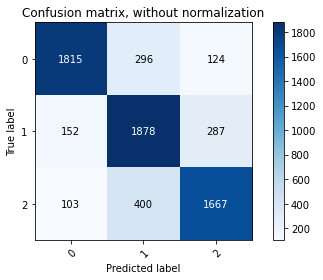

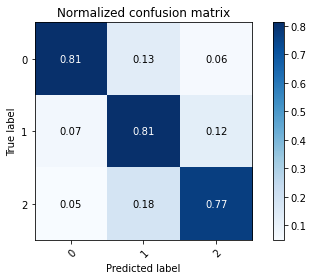

In [119]:
#Print Confusion Matrix
np.set_printoptions(precision=2)

plot_confusion_matrix_2(test_set_2.classes, y_pred_three, classes=class_names_1,
                      title='Confusion matrix, without normalization') #not normalized confusion matrix

plot_confusion_matrix_2(test_set_2.classes, y_pred_three, classes=class_names_1, normalize=True,
                      title='Normalized confusion matrix') #normalized confusion matrix

plt.show()

In [120]:
from sklearn.metrics import classification_report
print(classification_report(test_set_2.classes, y_pred_three, target_names=class_names_1))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2235
           1       0.73      0.81      0.77      2317
           2       0.80      0.77      0.78      2170

    accuracy                           0.80      6722
   macro avg       0.80      0.80      0.80      6722
weighted avg       0.80      0.80      0.80      6722



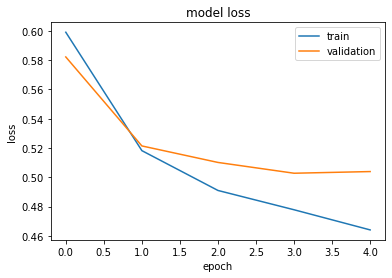

In [121]:
#Loss Curves
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

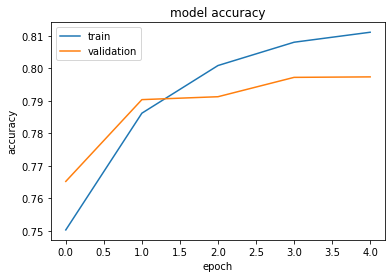

In [122]:
#Accuracy Curves
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [86]:
#ImageDataGenerator for Four
train_datagen_3 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen_3 = ImageDataGenerator(preprocessing_function=preprocess_input)

batch_size = 50

training_set_3 = train_datagen_3.flow_from_directory(traindir_3,
                                                 target_size=(224, 224),
                                                 color_mode="rgb",
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

valid_set_3 = test_datagen_3.flow_from_directory(testdir_3,
                                            target_size=(224, 224),
                                            color_mode="rgb",
                                            batch_size=50,
                                            class_mode='categorical')

test_set_3 = test_datagen_3.flow_from_directory(testdir_3,
                                            target_size=(224, 224),
                                            color_mode="rgb",
                                            batch_size=100,
                                            class_mode=None,
                                            shuffle=False)

Found 18510 images belonging to 4 classes.
Found 7934 images belonging to 4 classes.
Found 7934 images belonging to 4 classes.


In [87]:
#Define Model
res18_model_3=ResNet18(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [88]:
# Freeze
for layer in res18_model_3.layers[:85]:
    layer.trainable = False

In [89]:
train_num_3 = training_set_3.samples
test_num_3 = test_set_3.samples

In [90]:
x = res18_model_3.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(64, activation='relu')(x)
x = K.layers.BatchNormalization()(x)
x = Dense(4, activation='softmax')(x) # Softmax for multiclass
res_model_3 = Model(inputs=res18_model_3.input, outputs=x)

In [91]:
from tensorflow.keras import layers, models, Model, optimizers
initial_lr = 0.01
decay_rate = initial_lr*(1+(initial_lr*164))**0.75
        
sgd = keras.optimizers.SGD(learning_rate = initial_lr, momentum = 0.9, decay = decay_rate, nesterov=False)
res_model_3.compile(optimizer = sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
history_3 = res_model_3.fit_generator(generator=training_set_3,
                         steps_per_epoch=train_num_3//batch_size,
                         epochs=5,
                         validation_data=valid_set_3
                         )

Epoch 1/5
370/370 [==============================] - 751s 2s/step - loss: 0.9059 - accuracy: 0.6438 - val_loss: 0.7467 - val_accuracy: 0.7100
Epoch 2/5
370/370 [==============================] - 749s 2s/step - loss: 0.7184 - accuracy: 0.7210 - val_loss: 0.7022 - val_accuracy: 0.7314
Epoch 3/5
370/370 [==============================] - 721s 2s/step - loss: 0.6637 - accuracy: 0.7455 - val_loss: 0.7062 - val_accuracy: 0.7275
Epoch 4/5
370/370 [==============================] - 756s 2s/step - loss: 0.6299 - accuracy: 0.7587 - val_loss: 0.6672 - val_accuracy: 0.7469
Epoch 5/5
370/370 [==============================] - 746s 2s/step - loss: 0.6149 - accuracy: 0.7669 - val_loss: 0.6559 - val_accuracy: 0.7512


In [101]:
#Define Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            
    cm = confusion_matrix(y_true, y_pred) #compute confusion matrix
    classes = [0,1,2,3]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #creates normalized matrix
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots() #plots confusion matrix using imshow
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes, #add ticks and labels to the plot
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'  #add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [102]:
#Predict Y labels
Y_pred_all = res_model_3.predict(test_set_3)
y_pred_all = np.argmax(Y_pred_all, axis=1)

In [103]:
from sklearn.metrics import confusion_matrix
class_names = ['0', '1', '2', '3']

Confusion matrix, without normalization
[[1984  215   93   34]
 [ 275 1653  242  126]
 [ 156  329 1556   69]
 [ 137  220   78  767]]
Normalized confusion matrix
[[0.85 0.09 0.04 0.01]
 [0.12 0.72 0.11 0.05]
 [0.07 0.16 0.74 0.03]
 [0.11 0.18 0.06 0.64]]


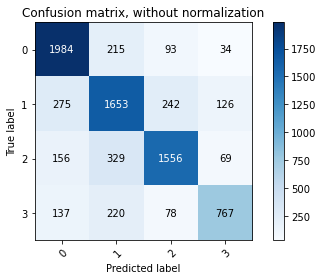

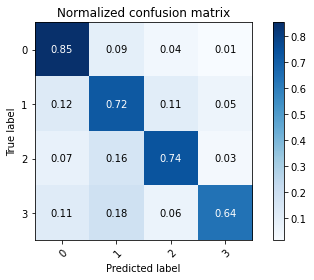

In [104]:
#Print Confusion Matrix
np.set_printoptions(precision=2)

plot_confusion_matrix(test_set_3.classes, y_pred_all, classes=class_names,
                      title='Confusion matrix, without normalization') #not normalized confusion matrix

plot_confusion_matrix(test_set_3.classes, y_pred_all, classes=class_names, normalize=True,
                      title='Normalized confusion matrix') #normalized confusion matrix

plt.show()

In [105]:
from sklearn.metrics import classification_report
print(classification_report(test_set_3.classes, y_pred_all, target_names=class_names))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2326
           1       0.68      0.72      0.70      2296
           2       0.79      0.74      0.76      2110
           3       0.77      0.64      0.70      1202

    accuracy                           0.75      7934
   macro avg       0.76      0.74      0.74      7934
weighted avg       0.75      0.75      0.75      7934



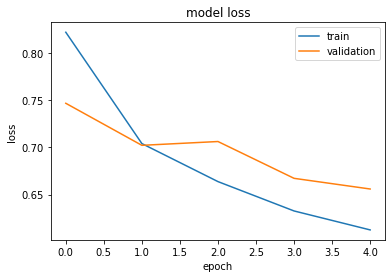

In [106]:
#Loss Curves
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

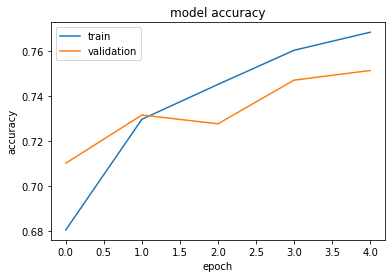

In [107]:
#Accuracy Curves
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()